# Behind the Grades: Mental Health Trends in Indian Students


### Motivation

Our project explores the Student Depression Dataset from Kaggle, which contains survey responses from approximately 28,000 university students across India. The dataset provides comprehensive insights into student mental health, including 18 different metrics for each student: depression status, academic performance (CGPA), lifestyle habits (sleep patterns, social media usage), basic demographics (age, gender), and important mental health indicators (presence of suicidal thoughts, family history of mental illness). This well-structured information allows us to analyze both the prevalence and potential causes of depression among Indian students.

We selected this dataset because student mental health represents a critical yet frequently overlooked issue. With more than 60% of students in the dataset reporting depression symptoms, we identified an important opportunity to illuminate the challenges that exist beneath the surface of academic achievement. Being students ourselves, we relate to these difficulties and wanted to develop visualizations that could help others identify warning signs and better understand the various factors that influence mental wellbeing in educational environments.

Our main objective was to create an accessible narrative that effectively communicates the complex nature of student mental health. Rather than presenting only statistics, we aimed to convey the real human experiences behind the numbers. Through clear visualizations and thoughtful analysis, we sought to demonstrate how factors such as academic pressure, sleep quality, and social media habits connect with depression. By designing our website as a progressive journey from basic statistics to more nuanced relationships, we intended to create a resource valuable to educators, parents, and students alike, potentially contributing to increased awareness and improved support systems.

### Dataset:
This comprehensive dataset was obtained from Kaggle's public repository and loaded using the kagglehub API for reproducible analysis. The data is structured in tabular format with each row representing an individual student's survey response.

Source: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset

In [1]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)


print("Files in dataset:", os.listdir(path))
csv_path = os.path.join(path, "student_depression_dataset.csv")
df = pd.read_csv(csv_path)

e:\DTU\Sem 2\Social data Analysis\02806_Final_Project.github.io\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\UPASANA\.cache\kagglehub\datasets\adilshamim8\student-depression-dataset\versions\1
Files in dataset: ['student_depression_dataset.csv']


### Basic stats

In [2]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [3]:
df_clean = df.copy()

# binary conversion: convert 'Yes'/'No' to 1/0
df_clean['Suicidal_Thoughts'] = df_clean['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df_clean['Family_History'] = df_clean['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# ordinal encoding: map 'Financial Stress' to numeric 
financial_stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df_clean['Financial_Stress_Score'] = df_clean['Financial Stress'].map(financial_stress_map)

# map 'Sleep Duration' to estimated hours
sleep_duration_map = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}
df_clean['Sleep_Hours'] = df_clean['Sleep Duration'].map(sleep_duration_map)

# rename columns
df_clean.rename(columns={
    'Work/Study Hours': 'Work_Study_Hours',
    'Job Satisfaction': 'Job_Satisfaction',
    'Study Satisfaction': 'Study_Satisfaction',
    'Academic Pressure': 'Academic_Pressure',
    'Work Pressure': 'Work_Pressure',
    'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts',
    'Sleep Duration': 'Sleep_Duration',
    'Dietary Habits': 'Dietary_Habits',
    'Financial Stress': 'Financial_Stress',
    'Family History of Mental Illness': 'Family_History',
}, inplace=True)


print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      27901 non-null  int64  
 1   Gender                  27901 non-null  object 
 2   Age                     27901 non-null  float64
 3   City                    27901 non-null  object 
 4   Profession              27901 non-null  object 
 5   Academic_Pressure       27901 non-null  float64
 6   Work_Pressure           27901 non-null  float64
 7   CGPA                    27901 non-null  float64
 8   Study_Satisfaction      27901 non-null  float64
 9   Job_Satisfaction        27901 non-null  float64
 10  Sleep_Duration          27901 non-null  object 
 11  Dietary_Habits          27901 non-null  object 
 12  Degree                  27901 non-null  object 
 13  Suicidal_Thoughts       27901 non-null  object 
 14  Work_Study_Hours        27901 non-null

In [4]:
# one-hot encode 'Gender' and 'Profession'
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Profession'], drop_first=True)
print(df_encoded.columns)
print(df_encoded.info())
print(df_encoded.head())
#df_encoded.to_csv("student_depression_cleaned.csv", index=False)

Index(['id', 'Age', 'City', 'Academic_Pressure', 'Work_Pressure', 'CGPA',
       'Study_Satisfaction', 'Job_Satisfaction', 'Sleep_Duration',
       'Dietary_Habits', 'Degree', 'Suicidal_Thoughts', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History', 'Depression', 'Suicidal_Thoughts',
       'Family_History', 'Financial_Stress_Score', 'Sleep_Hours',
       'Gender_Male', 'Profession_'Content Writer'',
       'Profession_'Digital Marketer'', 'Profession_'Educational Consultant'',
       'Profession_'UX/UI Designer'', 'Profession_Architect',
       'Profession_Chef', 'Profession_Doctor', 'Profession_Entrepreneur',
       'Profession_Lawyer', 'Profession_Manager', 'Profession_Pharmacist',
       'Profession_Student', 'Profession_Teacher'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               ---

In [5]:
df.columns


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

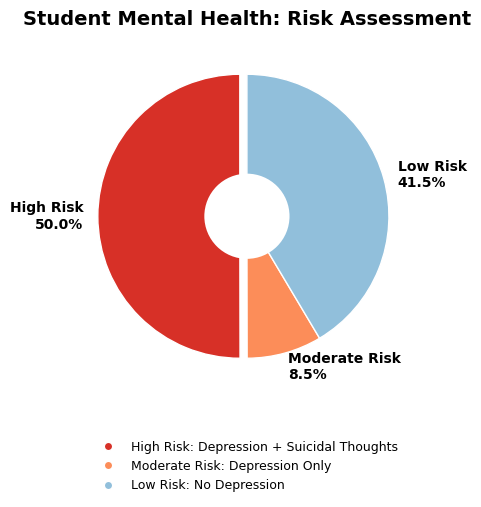

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5, 5))

# Define the main statistics to highlight
total_students = len(df)
depressed_count = df['Depression'].sum()
depressed_percent = round((depressed_count / total_students * 100), 1)

# Count students in each risk category
high_risk_count = df[(df['Depression'] == 1) & 
                     (df['Have you ever had suicidal thoughts ?'] == 'Yes')].shape[0]
high_risk_percent = round((high_risk_count / total_students * 100), 1)

moderate_risk_count = df[(df['Depression'] == 1) & 
                         (df['Have you ever had suicidal thoughts ?'] == 'No')].shape[0]
moderate_risk_percent = round((moderate_risk_count / total_students * 100), 1)

low_risk_count = total_students - high_risk_count - moderate_risk_count
low_risk_percent = round((low_risk_count / total_students * 100), 1)

# Data for pie chart
sizes = [high_risk_count, moderate_risk_count, low_risk_count]
labels = [f'High Risk\n{high_risk_percent}%',
         f'Moderate Risk\n{moderate_risk_percent}%',
         f'Low Risk\n{low_risk_percent}%']
colors = ['#d73027', '#fc8d59', '#91bfdb']
explode = (0.05, 0, 0)

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='',
       startangle=90, explode=explode,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10, 'fontweight': 'bold'})

# Add title with Life Risk focus
plt.title('Student Mental Health: Risk Assessment',
         fontsize=14, fontweight='bold', pad=10)

circle = plt.Circle((0,0), 0.3, fc='white')
plt.gca().add_artist(circle)

plt.subplots_adjust(bottom=0.17)  # Add more room at the bottom

# Create a custom legend outside the axis area
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#d73027', markersize=6, 
              label='High Risk: Depression + Suicidal Thoughts'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#fc8d59', markersize=6, 
              label='Moderate Risk: Depression Only'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#91bfdb', markersize=6, 
              label='Low Risk: No Depression')
]

# Position the legend closer to the bottom of the chart
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.10), 
         ncol=1, frameon=False, fontsize=9)

# Save the plot to the plots folder with tight bbox but preserving the bottom margin
plt.savefig("plots/Pie_chart_mental_health_risk.png", dpi=300, bbox_inches='tight', 
           pad_inches=0.2)
plt.show()

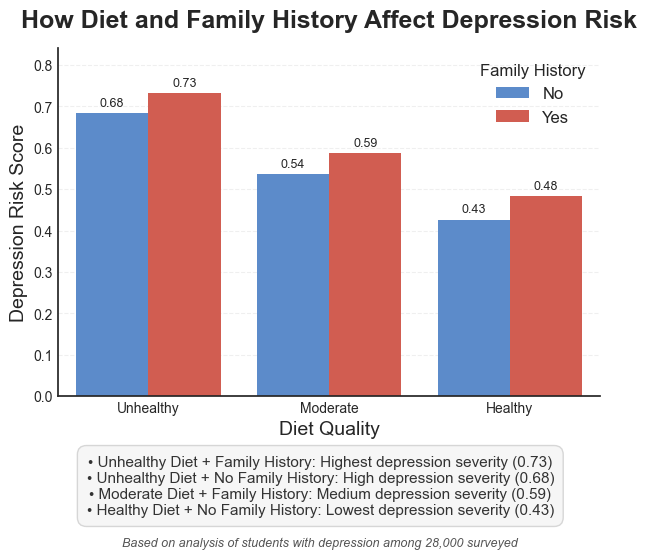

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(7, 6)) 

combined_data = df.pivot_table(
    values='Depression',
    index='Dietary Habits',
    columns='Family History of Mental Illness',
    aggfunc='mean'
).reset_index()

# Reshape data for plotting
plot_data = pd.melt(
    combined_data, 
    id_vars='Dietary Habits', 
    var_name='Family History of Mental Illness', 
    value_name='Depression Risk'
)

# Sort by dietary habits
diet_order = ['Unhealthy', 'Moderate', 'Healthy']
if set(diet_order).issubset(set(plot_data['Dietary Habits'])):
    plot_data['Dietary Habits'] = pd.Categorical(
        plot_data['Dietary Habits'], 
        categories=diet_order, 
        ordered=True
    )
    plot_data = plot_data.sort_values('Dietary Habits')

# Create the bar chart
bars = sns.barplot(
    x='Dietary Habits', 
    y='Depression Risk', 
    hue='Family History of Mental Illness',
    data=plot_data,
    palette=['#4A89DC', '#E64C3C'], 
    ax=ax
)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Title - simple and direct
plt.title('How Diet and Family History Affect Depression Risk', 
          fontsize=18, fontweight='bold', pad=15)

plt.xlabel('Diet Quality', fontsize=14)
plt.ylabel('Depression Risk Score', fontsize=14)

# Simplified legend
plt.legend(title='Family History', fontsize=12, 
           title_fontsize=12, loc='upper right', framealpha=0.9)

# Clean up the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Make sure y-axis starts at 0
plt.ylim(0, max(plot_data['Depression Risk']) * 1.15)

risk_explanation = (
    "• Unhealthy Diet + Family History: Highest depression severity (0.73)\n"
    "• Unhealthy Diet + No Family History: High depression severity (0.68)\n"
    "• Moderate Diet + Family History: Medium depression severity (0.59)\n"
    "• Healthy Diet + No Family History: Lowest depression severity (0.43)"
)

plt.subplots_adjust(bottom=0.30)

# Add the explanation text box
props = dict(boxstyle='round,pad=0.6', facecolor='#f5f5f5', alpha=0.9, edgecolor='lightgrey')
fig.text(0.5, 0.15, risk_explanation, 
        ha='center', va='center', fontsize=11, color='#333333',
        bbox=props)

# Add the source note below the explanation text
fig.text(0.5, 0.05, "Based on analysis of students with depression among 28,000 surveyed", 
        ha='center', fontsize=9, fontstyle='italic', color='#555555')

plt.savefig('depression_factors_diet_and_Family_History.png', dpi=120, bbox_inches='tight', facecolor='white')
plt.show()